In [11]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train10K.csv')

train_set, test_set = train_test_split(df, test_size=0.15, random_state=42)

y_train = train_set[["approved"]].copy()
X_train = train_set.drop(["approved","amount","label"],axis=1)
X_train = X_train.values.astype(np.float32)
y_train = y_train.values.reshape(-1)

y_test = test_set[["approved"]].copy()
y_test = y_test.values.reshape(-1)
X_test = test_set.drop(["approved","amount","label"],axis=1)
X_test = X_test.values.astype(np.float32)

X_valid, X_train = X_train[:1000], X_train[1000:]
y_valid, y_train = y_train[:1000], y_train[1000:]

In [17]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y = encoder.transform(y_train)
dummy_y = np_utils.to_categorical(encoded_y)

In [18]:
dummy_y

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.]], dtype=float32)

In [3]:
def clf_model():
    model = Sequential()
    model.add(Dense(100, input_dim=8, kernel_initializer='normal',activation='relu'))
    model.add(Dense(50,kernel_initializer='normal',activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [5]:
seed = 7
np.random.seed(seed)
estimator = KerasRegressor(build_fn=clf_model,epochs=50,batch_size=50,verbose=0)

In [6]:
kfold = KFold(n_splits=5, random_state=seed)
result = cross_val_score(estimator,X_train,y_train,cv=kfold)
scores = np.sqrt(-result)

In [7]:
def score_show(scores):
    print("Score: ",scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [9]:
score_show(result)

Score:  [-0.02920458 -0.00394147 -0.00739842 -0.00449282 -0.00421797]
Mean:  -0.00985105163427
Standard Deviation:  0.00975643138532


In [38]:
model = clf_model()
history = model.fit(X_train, y_train, epochs=200,batch_size=50,validation_split=0.2)

Train on 6000 samples, validate on 1500 samples
Epoch 1/200
6000/6000 [==============================] - 1s 89us/step - loss: 0.4252 - acc: 0.8017 - val_loss: 0.2926 - val_acc: 0.8680
Epoch 2/200
6000/6000 [==============================] - 0s 20us/step - loss: 0.2738 - acc: 0.8753 - val_loss: 0.2375 - val_acc: 0.8953
Epoch 3/200
6000/6000 [==============================] - 0s 20us/step - loss: 0.2370 - acc: 0.8875 - val_loss: 0.2063 - val_acc: 0.9087
Epoch 4/200
6000/6000 [==============================] - 0s 18us/step - loss: 0.2097 - acc: 0.9058 - val_loss: 0.1855 - val_acc: 0.9133
Epoch 5/200
6000/6000 [==============================] - 0s 21us/step - loss: 0.1813 - acc: 0.9208 - val_loss: 0.1605 - val_acc: 0.9280
Epoch 6/200
6000/6000 [==============================] - 0s 21us/step - loss: 0.1582 - acc: 0.9308 - val_loss: 0.1477 - val_acc: 0.9360
Epoch 7/200
6000/6000 [==============================] - 0s 18us/step - loss: 0.1349 - acc: 0.9473 - val_loss: 0.1091 - val_acc: 0.9613


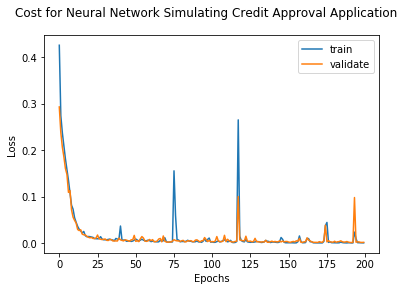

In [39]:
fig = plt.figure()
fig.suptitle('Cost for Neural Network Simulating Credit Approval Application')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validate')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('binary.jpg')
plt.show()

In [22]:
model.evaluate(X_train,y_train)

7500/7500 [==============================] - 0s 20us/step


[0.0044258395363266272, 0.99813333333333332]

In [ ]:
y_pred = model.predict(X_valid[:100]) > 0.5
print(y_pred)

In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_valid[:100], y_pred)

array([[36,  0],
       [ 0, 64]])

In [ ]:
y_valid

In [28]:
y_pred

array([[ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False]], dtype=bool)